<a href="https://colab.research.google.com/github/matsunagalab/tutorial_analyzingMDdata/blob/main/md_dimensionalreduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensional reduction

## MDTrajのインストール

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:15
🔁 Restarting kernel...


In [4]:
!conda install -c conda-forge mdtraj

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.5.2

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.2



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - mdtraj


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    astunparse-1.6.3           |     pyhd8ed1ab_0          15 KB  conda-forge
    blosc-1.21.4               |       h0f2a231_0          48 KB  conda-forge
    c-blosc2-2.10.0            |       hb4ffafa_0         298 KB  conda-forge
    ca-certificates-2023.5.7   |       hb

## T4 LysozymeのMDデータの取得

`wildtype.psf` と `wildtype.dcd` をダウンロードする。

In [1]:
!gdown 1GeXp7pbLO8nuK5L6x1xzxj1AX6kMnXy6
!gdown 1G_dnmdjgKFr-O8ciNo5JVR9iN4FQBAAE

Downloading...
From: https://drive.google.com/uc?id=1GeXp7pbLO8nuK5L6x1xzxj1AX6kMnXy6
To: /content/wildtype.psf
100% 623k/623k [00:00<00:00, 5.33MB/s]
Downloading...
From: https://drive.google.com/uc?id=1G_dnmdjgKFr-O8ciNo5JVR9iN4FQBAAE
To: /content/wildtype.dcd
100% 215M/215M [00:04<00:00, 46.0MB/s]


## 原子座標の主成分分析


In [11]:
import mdtraj as md
import numpy as np

# DCDファイルからトラジェクトリを読み込み、対応するPSFトポロジーファイルを使用する
# トラジェクトリオブジェクト traj が作成される
t = md.load('/content/wildtype.dcd', top='/content/wildtype.psf')

# traj の中身を出力する
print()

In [14]:
atoms_to_keep = [a.index for a in t.topology.atoms if a.name == 'CA']
t.restrict_atoms(atoms_to_keep)

<mdtraj.Trajectory with 6768 frames, 164 atoms, 164 residues, and unitcells at 0x7bc878df3e20>

In [16]:
t.superpose(t)

<mdtraj.Trajectory with 6768 frames, 164 atoms, 164 residues, and unitcells at 0x7bc878df3e20>

In [21]:
coordinates = t.xyz
coordinates = coordinates.reshape(-1, t.n_atoms*3)
coordinates.shape

(6768, 492)

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA()
pca_result = pca.fit_transform(coordinates)

Text(0.5, 1.0, 'PCA scatter plot')

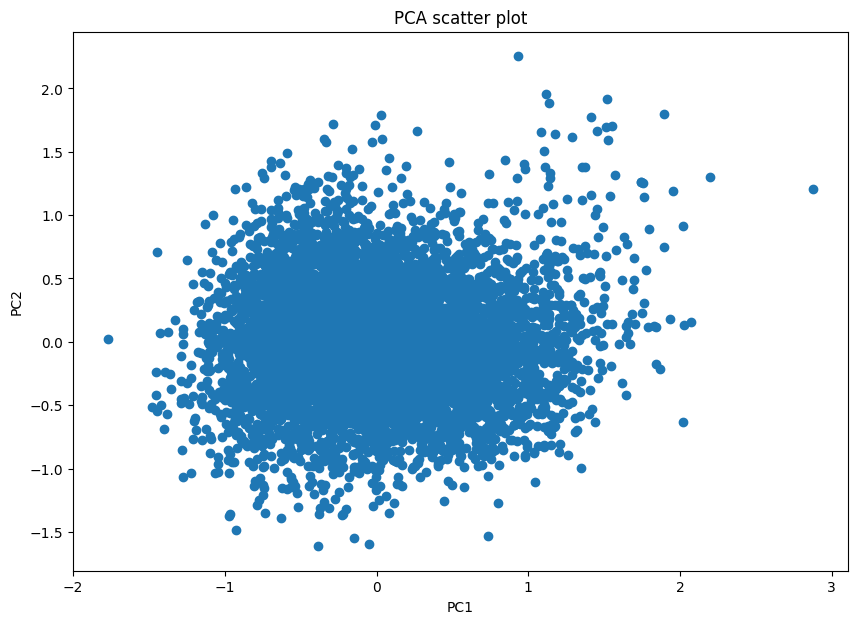

In [38]:
# Plot the first two principal components
plt.figure(figsize=(10, 7))
plt.scatter(x=pca_result[:, 0], y=pca_result[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA scatter plot')

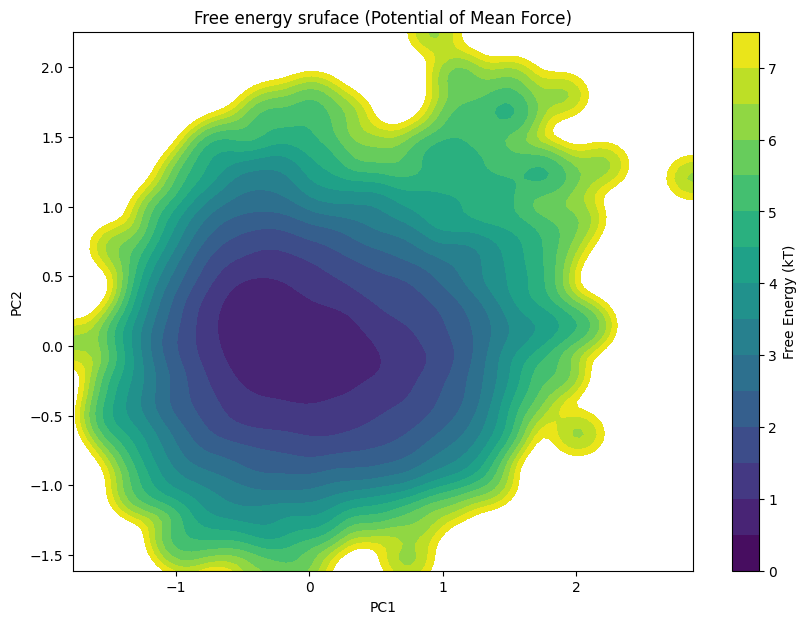

In [44]:
# Calculate the potential of mean force
kde = gaussian_kde(np.vstack([pca_result[:, 0], pca_result[:, 1]]))

# Compute the potential of mean force
x, y = np.mgrid[min(pca_result[:, 0]):max(pca_result[:, 0]):100j,
                min(pca_result[:, 1]):max(pca_result[:, 1]):100j]
positions = np.vstack([x.ravel(), y.ravel()])
pmf = np.reshape(kde(positions), x.shape)

# Plot the potential of mean force as contours on top of the scatter plot
plt.figure(figsize=(10, 7))
plt.contourf(x, y, -np.log(pmf), np.arange(0.0, 8.0, 0.5), cmap='viridis')
plt.colorbar(label='Free Energy (kT)')
plt.title('Free energy sruface (Potential of Mean Force)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
